<a href="https://colab.research.google.com/github/evmpython/CAT212_2025/blob/main/CAT212_Aula_05_Serie_temporal_relampagos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Disciplina:** CAT212 - Microfísica de Nuvens e Eletricidade Atmosférica
---

## 🟢  **Aula Prática 5:** $\underline{Série\ Temporal\ de\ Relâmpagos}$

---

**OBJETIVO:**
- Nesta aula prática aprenderemos como plotar o ciclo diurno da quantidade de relâmpagos e pico de corrente dos dados de relâmpagos da rede [Earth Networks Total Lightning Network (ENTLN)](https://www.earthnetworks.com/why-us/networks/lightning/). Para mais informações sobre a ENTLN clique [aqui](https://www.earthnetworks.com/Portals/0/pdf/ENTLN%20Global%20Slick_v4.pdf).

---

**DADOS DE ENTRADA**:

Arquivos texto de relâmpagos.

- **Tipo do dado:** tabela  
- **Formato do dado:** arquivo TEXTO
- **Nome do arquivo:** pulse_CLIMATE_2020-01-01.txt.gz
- **Fonte dos dados:** Rede EarthNetwork, cedido para fins didáticos pela CLIMATEMPO



---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figuras e tabelas
- **Formato do dado:** arquivo JPG e CSV
- **Imagens geradas:**
    1. Fig_1_diurno_ic.jpg
    2. Fig_2_diurno_todostipos.jpg
    3. Fig_3_diurno_pc.jpg
    4. tabela_raios_cgneg.csv
    5. tabela_raios_cgpos.csv
    6. tabela_raios_ic.csv



---
**PROCEDIMENTO REALIZADO:**

Os seguintes procedimentos são realizados nesse código:

1.   Instalando bibliotecas
2.   Importando bibliotecas
3.   Montando drive
4.   Definindo caminho do diretório
5.   Destargeando arquivo de relâmpagos
6.   Calculando algumas estatísticas
7.   Selecionando linhas, sob alguma condição
8.   Plotando figuras
     - Relâmpagos por hora
     - Pico de corrente por hora



---

**OBSERVAÇÕES IMPORTANTES**:
1. Mudar o caminho para o seu drive
2. Escolher a data (ano, mês e dia) para análise


---
**PROFESSOR:**

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Atualizado em: 11/04/2025


---



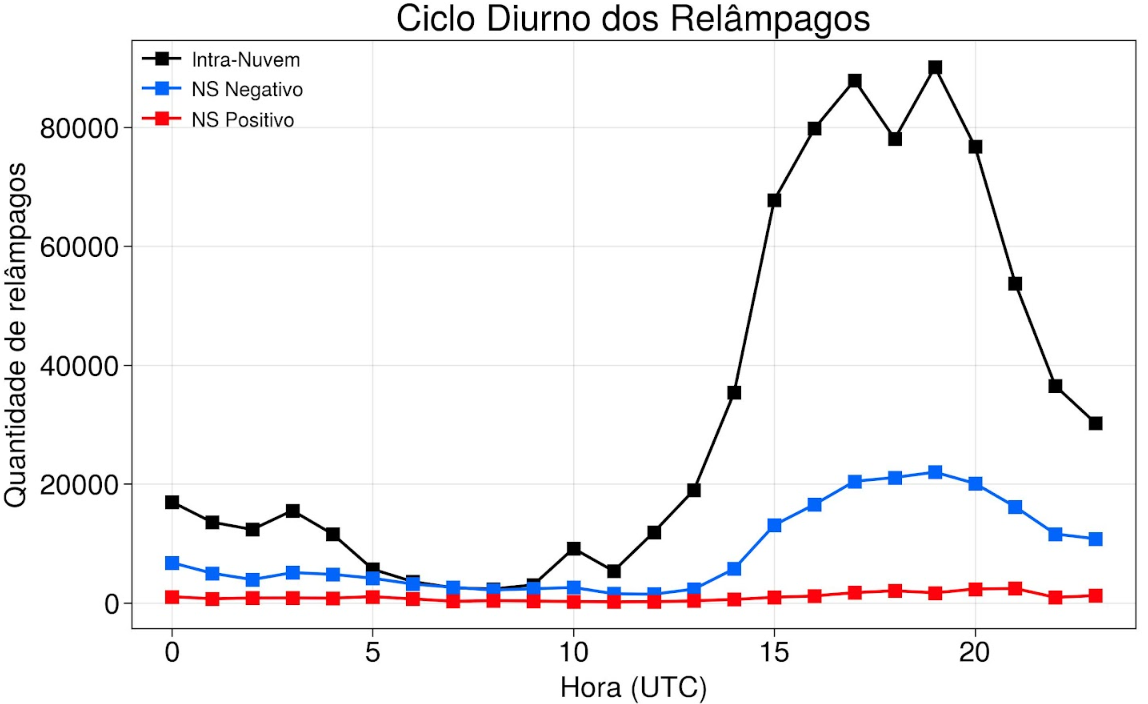

# **1° Passo:** Instalando bibliotecas

In [1]:
!pip install -q ultraplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 34.9 MB/s eta 0:00:00


# **2° Passo:** Importando Bibliotecas

In [2]:
import numpy as np           # Biblioteca para trabalhar com matrizes
import pandas as pd          # Biblioteca para trabalhar com tabelas (parecidas com tabelas em excel)
import ultraplot as uplt     # Biblioteca para gerar figuras
import glob                  # Biblioteca para gerar uma lista dos arquivos
import tarfile               # Biblioteca para destargear um arquivo
from zipfile import ZipFile  # Biblioteca para descompactar um arquivo
import os                    # Biblioteca para acessar o sistema operacional
from tqdm import tqdm        # Biblioteca para contar duração de um processamento

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **3° Passo:** Montando drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [4]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/1_PRIMEIRO_SEMESTRE/CAT212 - MICROFÍSICA DE NUVENS E ELETRICIDADE ATMOSFÉRICA/AULAS/CAT212 - PYTHON PARA MICROFISICA DE NUVENS/AULA_05_RELAMPAGOS_SERIE_TEMPORAL'

- Criando a pasta de saída (`output`)

In [5]:
os.makedirs(f'{dir}/output/', exist_ok=True)
os.makedirs(f'/content/txt/', exist_ok=True)

#**PARTE 1:** Destargeando o arquivo de relâmpagos

- São arquivos de relâmpagos para o ano de 2020, separados por dia. Após destargeados eles serão salvos no Drive na pasta `/content/txt`.

In [6]:
%%time
# Caminho onde o arquivo .tar está localizado
input_path = f'{dir}/input/raios_2020-01.tar'

# Caminho onde os arquivos extraídos serão salvos
output_path = f'/content/txt'

# Abrir o arquivo tar.gz
tar = tarfile.open(input_path)

# Listar os nomes dos arquivos dentro do tar
tar.getnames()

# Extrair todos os arquivos para o caminho desejado
tar.extractall(path=output_path)

# Fechar o arquivo tar
tar.close()

CPU times: user 111 ms, sys: 1.27 s, total: 1.38 s
Wall time: 13.7 s


# **PARTE 2:** Conhecendo os dados de relâmpagos

#### **Lendo o arquivo: `read_csv()`**

* Lendo a tabela com o comando **read_csv**. A tabela fica armazenada na variável **df** (df=DataFrame, significa tabela em português). Mas podemos colocar o nome que quisermos. Por exemplo: tabela, dados, raios e etc.
* Vejam como é simples. Com apenas **1 linha** fizemos a leitura do arquivo de relâmpagos. Essa é a **facilidade do Python** :)

In [24]:
# insira a data do arquivo de raios
data = '2020-01-01'

In [25]:
df = pd.read_csv(f'/content/txt/raios_2020-01/pulse_CLIMATE_{data}.txt.gz', delimiter='\s+')
df

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443.0,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507.0,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213.0,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643.0,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008.0,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756.0,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917.0,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049.0,0,1,0.0


In [26]:
df['tipo'].unique()

array(['CG', 'IC', '2020'], dtype=object)

In [27]:
df = df[df['tipo'] != '2020']
df

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443.0,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507.0,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213.0,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643.0,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008.0,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756.0,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917.0,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049.0,0,1,0.0


In [28]:
# https://apps.timwhitlock.info/emoji/tables/unicode
print('\U0001F601')

😁


Visualizando o tipo da tabela **df** --> **pandas.DataFrame**

In [29]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


#### **Visualizando os dados da tabela: `display()`**
* **CG** = Cloud-to-ground: significa nuvem-solo
* **IC** = Intra-Cloud: significa intra-nuvem

In [30]:
display(df)

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443.0,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507.0,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213.0,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643.0,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008.0,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756.0,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917.0,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049.0,0,1,0.0


#### **Visualizando as primeiras 5 linhas da tabela: `head()`**

Visualizando as primeiras 5 linhas

In [31]:
df.head()

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443.0,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507.0,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213.0,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643.0,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464.0,0,1,0.0


Visualizando as primeiras 10 linhas

In [32]:
df.head(10)

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443.0,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507.0,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213.0,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643.0,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464.0,0,1,0.0
5,99999999,IC,2020,1,1,23,59.0,59.0,-29.6930,-66.4831,-2320.0,0,1,0.0
6,99999999,IC,2020,1,1,23,59.0,59.0,-29.2990,-66.5547,3296.0,0,1,0.0
7,99999999,IC,2020,1,1,23,59.0,59.0,-29.2951,-66.5342,3038.0,0,1,0.0
8,99999999,IC,2020,1,1,23,59.0,59.0,-29.0053,-65.3847,10046.0,0,1,0.0
9,99999999,IC,2020,1,1,23,59.0,59.0,-28.9933,-65.4335,2019.0,0,1,0.0


#### **Visualizando as últimas 5 linhas da tabela: `tail()`**

Visualizando as últimas 5 linhas

In [33]:
df.tail()

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008.0,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756.0,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917.0,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049.0,0,1,0.0
1003640,99999999,IC,2020,1,1,0,0.0,0.0,-23.4168,-58.0207,5883.0,0,1,0.0


Visualizando as últimas 10 linhas

In [34]:
df.tail(10)

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
1003631,99999999,IC,2020,1,1,0,0.0,3.0,-32.5808,-69.9391,5964.0,0,1,0.0
1003632,99999999,IC,2020,1,1,0,0.0,3.0,-28.6316,-68.7282,-5646.0,0,1,0.0
1003633,99999999,IC,2020,1,1,0,0.0,3.0,-28.7806,-68.6454,-9773.0,0,1,0.0
1003634,99999999,IC,2020,1,1,0,0.0,2.0,-23.6878,-57.9198,5347.0,0,1,0.0
1003635,99999999,IC,2020,1,1,0,0.0,2.0,-29.3232,-66.5353,10227.0,0,1,0.0
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008.0,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756.0,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917.0,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049.0,0,1,0.0
1003640,99999999,IC,2020,1,1,0,0.0,0.0,-23.4168,-58.0207,5883.0,0,1,0.0


#### **Mostrando a quantidade de linhas e colunas da tabela: `shape`**

Descobrindo o tamanho da tabela: **(quantidade de linhas, quantidade de colunas)**: `shape`


In [35]:
df.shape

(1003618, 14)

Descobrindo a quantidade de linhas da tabela

In [36]:
df.shape[0]

1003618

Descobrindo a quantidade de colunas da tabela

In [37]:
df.shape[1]

14

#### **Mostrando o tipo das variáveis da tabela. Exemplo: inteiro, real e objeto: `info()`**

* O formato *object* é um caracter

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003618 entries, 0 to 1003640
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1003618 non-null  int64  
 1   tipo       1003618 non-null  object 
 2   ano        1003618 non-null  int64  
 3   mes        1003618 non-null  int64  
 4   dia        1003618 non-null  int64  
 5   hor        1003618 non-null  int64  
 6   min        1003618 non-null  float64
 7   seg        1003618 non-null  float64
 8   lat        1003618 non-null  float64
 9   lon        1003618 non-null  float64
 10  pc(A)      1003618 non-null  float64
 11  alt_ic(m)  1003618 non-null  int64  
 12  sens       1003618 non-null  int64  
 13  mult       1003618 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 114.9+ MB


#### **Calculando valores minímino, máximo, média e etc da tabela: `describe()`**

Determinando várias estatísticas com apenas um comando

In [39]:
df.describe()

,id,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
count,1003618.0,1003618.0,1003618.0,1003618.0,1.003618e+06,1.003618e+06,1.003618e+06,1.003618e+06,1.003618e+06,1.003618e+06,1003618.0,1003618.0,1003618.0
mean,99999999.0,2020.0,1.0,1.0,1.588349e+01,2.980530e+01,2.956659e+01,-2.477512e+01,-5.762089e+01,-3.538810e+03,0.0,1.0,0.0
std,0.0,0.0,0.0,0.0,5.772431e+00,1.746525e+01,1.733539e+01,7.538500e+00,1.013177e+01,2.226166e+04,0.0,0.0,0.0
min,99999999.0,2020.0,1.0,1.0,0.000000e+00,0.000000e+00,0.000000e+00,-3.698700e+01,-8.029020e+01,-7.322236e+06,0.0,1.0,0.0
25%,99999999.0,2020.0,1.0,1.0,1.500000e+01,1.400000e+01,1.500000e+01,-3.103740e+01,-6.689820e+01,-6.714000e+03,0.0,1.0,0.0
50%,99999999.0,2020.0,1.0,1.0,1.700000e+01,3.000000e+01,3.000000e+01,-2.534230e+01,-5.759545e+01,-2.988000e+03,0.0,1.0,0.0
75%,99999999.0,2020.0,1.0,1.0,2.000000e+01,4.500000e+01,4.500000e+01,-2.160470e+01,-4.887440e+01,3.672000e+03,0.0,1.0,0.0
max,99999999.0,2020.0,1.0,1.0,2.300000e+01,5.900000e+01,5.900000e+01,1.043350e+01,-2.458530e+01,7.613850e+05,0.0,1.0,0.0


Determinando a estatística de uma coluna específica. Exemplo: coluna do **Pico de Corrente**.

In [40]:
df.describe()['pc(A)']

,pc(A)
count,1.003618e+06
mean,-3.538810e+03
std,2.226166e+04
min,-7.322236e+06
25%,-6.714000e+03
50%,-2.988000e+03
75%,3.672000e+03
max,7.613850e+05


# **PARTE 3:** Calculando algumas estatísticas

#### **Acessando os dados de uma coluna: `df['nome_da_coluna']`**

Acessando os valores da coluna que possui o nome $\underline{tipo}$ (tipo refere-se ao tipo de relâmpago). Existem dois tipos: **IC** (intra-nuvem) e **CG** (nuvem-solo).

In [41]:
df

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443.0,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507.0,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213.0,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643.0,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008.0,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756.0,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917.0,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049.0,0,1,0.0


In [42]:
df['tipo']

,tipo
0,CG
1,CG
2,IC
3,CG
4,IC
...,...
1003636,CG
1003637,IC
1003638,IC
1003639,IC


Acessando os valores da coluna $\underline{ano}$ (ano refere-se ao ano do relâmpago). Exemplo: 2018, 2019, 2020 e etc.

In [43]:
df['ano']

,ano
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
1003636,2020
1003637,2020
1003638,2020
1003639,2020


Acessando os valores da coluna $\underline{pc(A)}$ (pc(A) refere-se ao pico de corrente do relâmpago em Ampere). Além disso, o sinal na frente do número designa a polaridade do relâmpago. Exemplo: (**-**) negativo ou (**+**) positivo.

In [44]:
df['pc(A)']

,pc(A)
0,-33443.0
1,36507.0
2,16213.0
3,-4643.0
4,-2464.0
...,...
1003636,-27008.0
1003637,-7756.0
1003638,4917.0
1003639,7049.0


#### **Mudando o tipo de uma variaável: `.astype()`**

Verificando a coluna do pico de corrente

In [45]:
df['pc(A)']

,pc(A)
0,-33443.0
1,36507.0
2,16213.0
3,-4643.0
4,-2464.0
...,...
1003636,-27008.0
1003637,-7756.0
1003638,4917.0
1003639,7049.0


Transformando o formato dos valores da coluna pico de corrente para **inteiro** (em inglês, chama-se **integer**)

In [46]:
df['pc(A)'].astype(int)

,pc(A)
0,-33443
1,36507
2,16213
3,-4643
4,-2464
...,...
1003636,-27008
1003637,-7756
1003638,4917
1003639,7049


In [47]:
df['pc(A)']

,pc(A)
0,-33443.0
1,36507.0
2,16213.0
3,-4643.0
4,-2464.0
...,...
1003636,-27008.0
1003637,-7756.0
1003638,4917.0
1003639,7049.0


Vejam que ainda não mudou o valor, para isso precisamos fazer da seguinte maneira: **Agora sim!**

In [48]:
df['pc(A)'] = df['pc(A)'].astype(int)

In [49]:
df['pc(A)']

,pc(A)
0,-33443
1,36507
2,16213
3,-4643
4,-2464
...,...
1003636,-27008
1003637,-7756
1003638,4917
1003639,7049


#### **Eliminando colunas que não serão utilizadas: `drop()`**

Visualizando a tabela, para decidirmos qual **coluna** iremos retirar da tabela

In [50]:
df

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049,0,1,0.0


Vamos retirar as colunas: **id**, **alt_ic(m)**, **sens** e **mult**

* Comentário: **axis=0** (linhas da tabela) e **axis=1** (colunas da tabela)

In [51]:
df.drop(['id', 'alt_ic(m)', 'sens', 'mult'], axis=1)

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443
1,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464
...,...,...,...,...,...,...,...,...,...,...
1003636,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049


Visualizando a tabela após a operação.

In [52]:
df

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443,0,1,0.0
1,99999999,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507,0,1,0.0
2,99999999,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213,0,1,0.0
3,99999999,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643,0,1,0.0
4,99999999,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003636,99999999,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008,0,1,0.0
1003637,99999999,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756,0,1,0.0
1003638,99999999,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917,0,1,0.0
1003639,99999999,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049,0,1,0.0


 Vejam novamente, que as colunas **NÃO** foram eliminadas. Então adicionaremos o comando **inplace=True**

In [53]:
df.drop(['id', 'alt_ic(m)', 'sens', 'mult'], axis=1, inplace=True)

**Agora sim**, as colunas foram eliminadas da tabela

In [54]:
df

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33443
1,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36507
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16213
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4643
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2464
...,...,...,...,...,...,...,...,...,...,...
1003636,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27008
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7049


#### **Aplicando cálculos em uma coluna da tabela**: Neste exemplo transformaremos o pico de corrente de Ampere (A) para KiloAmpere (kA).

Visualizando a coluna do pico de corrente

In [55]:
df['pc(A)']

,pc(A)
0,-33443
1,36507
2,16213
3,-4643
4,-2464
...,...
1003636,-27008
1003637,-7756
1003638,4917
1003639,7049


Dividindo a coluna por 1000

In [56]:
df['pc(A)'] / 1000.

,pc(A)
0,-33.443
1,36.507
2,16.213
3,-4.643
4,-2.464
...,...
1003636,-27.008
1003637,-7.756
1003638,4.917
1003639,7.049


Visualizando a coluna pico de corrente após a operação

In [57]:
df['pc(A)']

,pc(A)
0,-33443
1,36507
2,16213
3,-4643
4,-2464
...,...
1003636,-27008
1003637,-7756
1003638,4917
1003639,7049


Vejam novamente, que os valores **NÃO** mudaram. Então podemos fazer da seguinte forma:

In [58]:
# dividindo a coluna por 1000 e substituindo o valor na coluna
df['pc(A)'] = df['pc(A)'] / 1000.

Agora sim **deu certo**!

In [59]:
df['pc(A)']

,pc(A)
0,-33.443
1,36.507
2,16.213
3,-4.643
4,-2.464
...,...
1003636,-27.008
1003637,-7.756
1003638,4.917
1003639,7.049


Renomeando o nome da coluna de pc(A) para pc(kA)

In [60]:
df.rename(columns={'pc(A)':'pc(kA)'}, inplace=True)
df

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33.443
1,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36.507
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16.213
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4.643
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2.464
...,...,...,...,...,...,...,...,...,...,...
1003636,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27.008
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7.756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4.917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7.049


Visualizando a tabela depois de renomear a coluna do pico de corrente

In [61]:
df

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33.443
1,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36.507
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16.213
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4.643
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2.464
...,...,...,...,...,...,...,...,...,...,...
1003636,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27.008
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7.756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4.917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7.049


#### **Acessando valores únicos de uma coluna**: `.unique()` e `.value_counts()`.

Mostrando os dados da coluna tipo

In [62]:
df['tipo']

,tipo
0,CG
1,CG
2,IC
3,CG
4,IC
...,...
1003636,CG
1003637,IC
1003638,IC
1003639,IC


Aplicando o comando **unique**

In [63]:
df['tipo'].unique()

array(['CG', 'IC'], dtype=object)

Contablizando os valores únicos com o comando **value_counts** em valores absolutos

In [64]:
df['tipo'].value_counts()

,count
tipo,
IC,768802
CG,234816


Contabilizando os valores únicos com o comando **value_counts** em valores $\underline{relativos}$

In [65]:
df['tipo'].value_counts(normalize=True)

,proportion
tipo,
IC,0.766031
CG,0.233969


Plotando alguns gráficos com a bilioteca **Pandas**

<Axes: xlabel='tipo'>

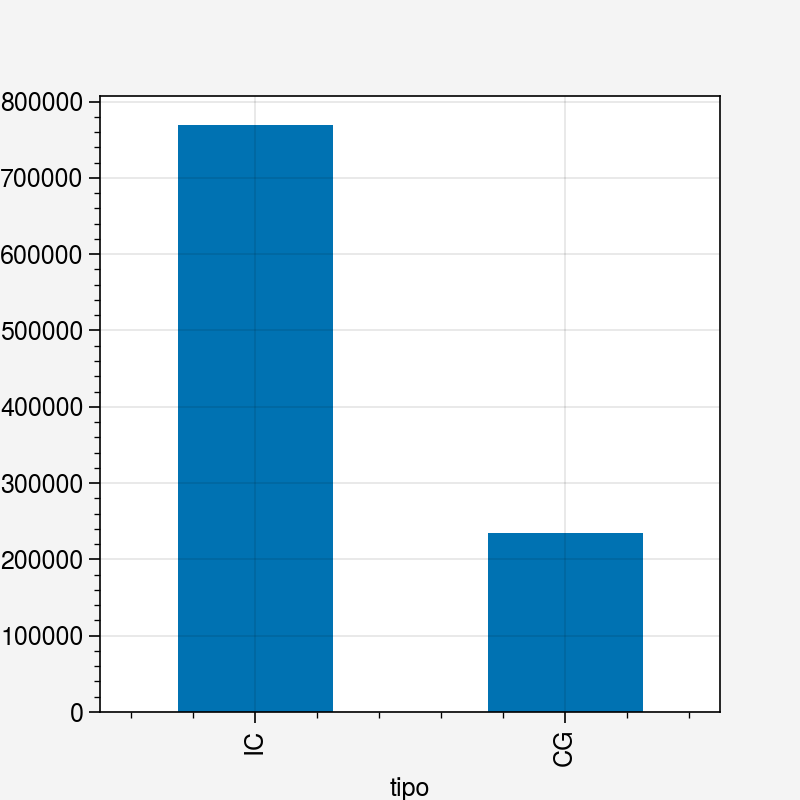

In [66]:
# gráfico de barras dos valores da coluna tipo
df['tipo'].value_counts().plot.bar()

<Axes: ylabel='count'>

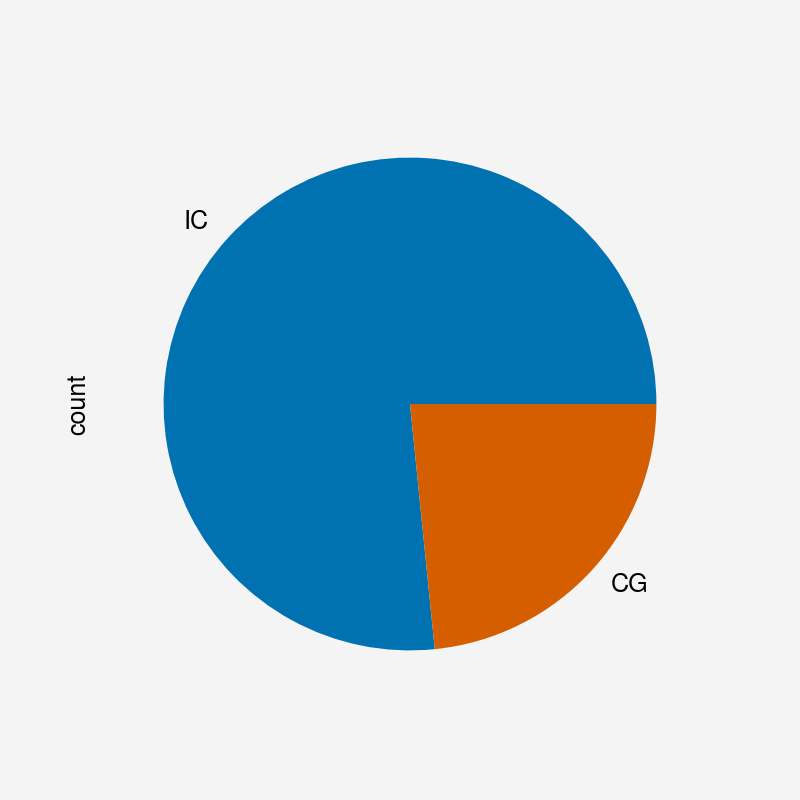

In [67]:
# gráfico de pizza dos valores da coluna tipo
df['tipo'].value_counts().plot.pie()

In [68]:
df['pc(kA)'].describe()

,pc(kA)
count,1.003618e+06
mean,-3.538810e+00
std,2.226166e+01
min,-7.322236e+03
25%,-6.714000e+00
50%,-2.988000e+00
75%,3.672000e+00
max,7.613850e+02


<Axes: >

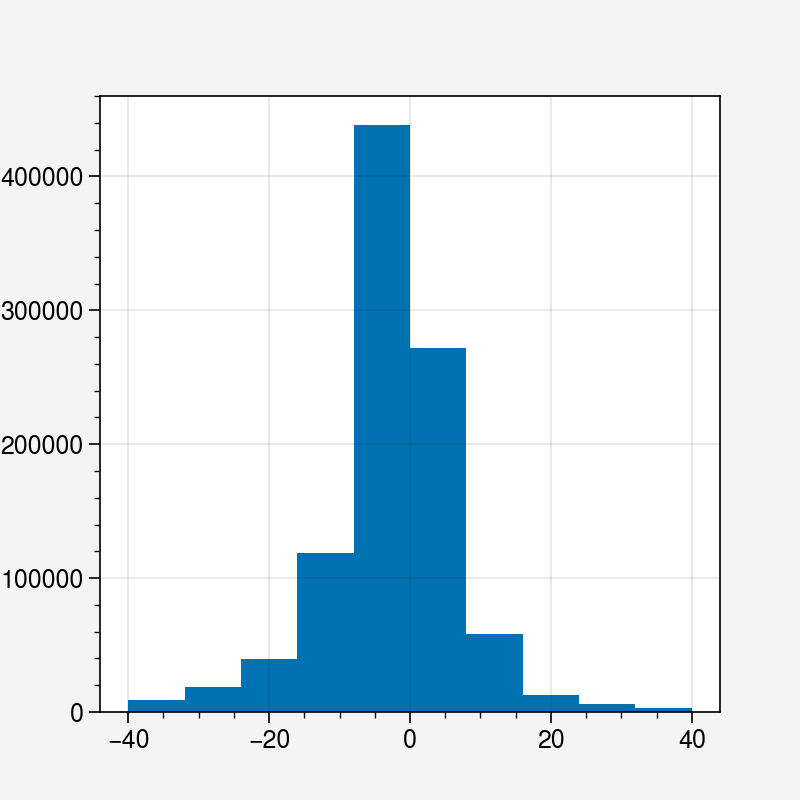

In [69]:
# histograma dos valores da coluna do pico de corrente
df['pc(kA)'].hist(bins=10, range=(-40, 40))

# **PARTE 4:** Selecionando linhas, sob alguma condição

#### **Mostrando a tabela**

In [70]:
df

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33.443
1,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36.507
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16.213
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4.643
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2.464
...,...,...,...,...,...,...,...,...,...,...
1003636,CG,2020,1,1,0,0.0,2.0,-29.3589,-66.6788,-27.008
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7.756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4.917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7.049


#### **Selecionando as linhas onde o $\underline{tipo\ é\ igual\ IC }$(intra-nuvem):**

In [71]:
df[ df['tipo']  == 'IC' ]

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16.213
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2.464
5,IC,2020,1,1,23,59.0,59.0,-29.6930,-66.4831,-2.320
6,IC,2020,1,1,23,59.0,59.0,-29.2990,-66.5547,3.296
7,IC,2020,1,1,23,59.0,59.0,-29.2951,-66.5342,3.038
...,...,...,...,...,...,...,...,...,...,...
1003635,IC,2020,1,1,0,0.0,2.0,-29.3232,-66.5353,10.227
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7.756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4.917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7.049


In [72]:
df_ic = df[ df['tipo']  == 'IC' ]
df_ic

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16.213
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2.464
5,IC,2020,1,1,23,59.0,59.0,-29.6930,-66.4831,-2.320
6,IC,2020,1,1,23,59.0,59.0,-29.2990,-66.5547,3.296
7,IC,2020,1,1,23,59.0,59.0,-29.2951,-66.5342,3.038
...,...,...,...,...,...,...,...,...,...,...
1003635,IC,2020,1,1,0,0.0,2.0,-29.3232,-66.5353,10.227
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7.756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4.917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7.049


#### **Selecionando as linhas onde o $\underline{tipo\ é\ igual\ CG }$(nuvem-solo) e o $\underline{pc(kA)}$ (pico de corrente) é $\underline{menor\ que\ 0\ kA}$:**

In [73]:
df[ (df['tipo']  == 'CG') & (df['pc(kA)'] < 0) ]

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33.443
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4.643
11,CG,2020,1,1,23,59.0,58.0,-20.1681,-43.4872,-5.741
13,CG,2020,1,1,23,59.0,57.0,-19.9145,-43.9371,-6.126
17,CG,2020,1,1,23,59.0,57.0,-30.1202,-69.0784,-4.900
...,...,...,...,...,...,...,...,...,...,...
1003621,CG,2020,1,1,0,0.0,5.0,-6.9903,-37.9176,-15.500
1003622,CG,2020,1,1,0,0.0,5.0,-10.8139,-75.7802,-12.294
1003623,CG,2020,1,1,0,0.0,5.0,-10.8016,-75.8007,-7.286
1003625,CG,2020,1,1,0,0.0,5.0,8.0551,-75.1079,-17.128


In [74]:
df_cgneg = df[ (df['tipo']  == 'CG') & (df['pc(kA)'] < 0) ]

In [75]:
df_cgneg

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33.443
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4.643
11,CG,2020,1,1,23,59.0,58.0,-20.1681,-43.4872,-5.741
13,CG,2020,1,1,23,59.0,57.0,-19.9145,-43.9371,-6.126
17,CG,2020,1,1,23,59.0,57.0,-30.1202,-69.0784,-4.900
...,...,...,...,...,...,...,...,...,...,...
1003621,CG,2020,1,1,0,0.0,5.0,-6.9903,-37.9176,-15.500
1003622,CG,2020,1,1,0,0.0,5.0,-10.8139,-75.7802,-12.294
1003623,CG,2020,1,1,0,0.0,5.0,-10.8016,-75.8007,-7.286
1003625,CG,2020,1,1,0,0.0,5.0,8.0551,-75.1079,-17.128


#### **Selecionando as linhas onde o $\underline{tipo\ é\ igual\ CG }$(nuvem-solo) e o $\underline{pc(kA)}$ (pico de corrente) é $\underline{maior\ que\ 0\ kA}$:**

In [76]:
df_cgpos = df[ (df['tipo']  == 'CG') & (df['pc(kA)'] > 0) ]

In [77]:
df_cgpos

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
1,CG,2020,1,1,23,59.0,59.0,-13.5453,-51.0689,36.507
19,CG,2020,1,1,23,59.0,57.0,1.1701,-76.4702,20.976
53,CG,2020,1,1,23,59.0,54.0,-28.6188,-65.2333,65.882
73,CG,2020,1,1,23,59.0,51.0,-13.5444,-51.2604,24.406
74,CG,2020,1,1,23,59.0,51.0,-13.4666,-51.1124,24.642
...,...,...,...,...,...,...,...,...,...,...
1003597,CG,2020,1,1,0,0.0,9.0,-13.7203,-71.9335,23.083
1003599,CG,2020,1,1,0,0.0,9.0,-14.0000,-72.0546,19.857
1003608,CG,2020,1,1,0,0.0,7.0,-13.7713,-72.5618,49.597
1003624,CG,2020,1,1,0,0.0,5.0,-14.0132,-71.9078,21.768


#### **Salvando num arquivo CSV: `to_csv()`**

In [78]:
df_ic.to_csv(f'{dir}/output/tabela_raios_ic.csv', sep=',', index=False, header=True)

In [79]:
df_cgneg.to_csv(f'{dir}/output/tabela_raios_cgneg.csv', sep=',', index=False, header=True)

In [80]:
df_cgpos.to_csv(f'{dir}/output/tabela_raios_cgpos.csv', sep=',', index=False, header=True)

# **PARTE 5:** Plotando figuras

##**Relâmpagos por hora:**

Mostrando a tabela

In [81]:
df_ic

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
2,IC,2020,1,1,23,59.0,59.0,-13.5023,-51.1038,16.213
4,IC,2020,1,1,23,59.0,59.0,-30.0779,-68.2541,-2.464
5,IC,2020,1,1,23,59.0,59.0,-29.6930,-66.4831,-2.320
6,IC,2020,1,1,23,59.0,59.0,-29.2990,-66.5547,3.296
7,IC,2020,1,1,23,59.0,59.0,-29.2951,-66.5342,3.038
...,...,...,...,...,...,...,...,...,...,...
1003635,IC,2020,1,1,0,0.0,2.0,-29.3232,-66.5353,10.227
1003637,IC,2020,1,1,0,0.0,1.0,-27.0914,-67.7643,-7.756
1003638,IC,2020,1,1,0,0.0,1.0,-27.0877,-67.7975,4.917
1003639,IC,2020,1,1,0,0.0,1.0,-23.7114,-58.0400,7.049


Agrupando os dados por hora para a coluna do ano. Aqui é mostrado a quantidade de relâmpagos **IC** para cada **hora** do dia.

In [82]:
# mostrando a coluna "hora"
df_ic['hor']

,hor
2,23
4,23
5,23
6,23
7,23
...,...
1003635,0
1003637,0
1003638,0
1003639,0


In [83]:
# agrupando os dados
df_ic.groupby('hor').count()['ano']

,ano
hor,
0,16984
1,13580
2,12348
3,15531
4,11587
5,5669
6,3572
7,2543
8,2341


Agrupando os dados por hora para a coluna do ano e plotando rapidamente em um gráfico de linha

<Axes: xlabel='hor'>

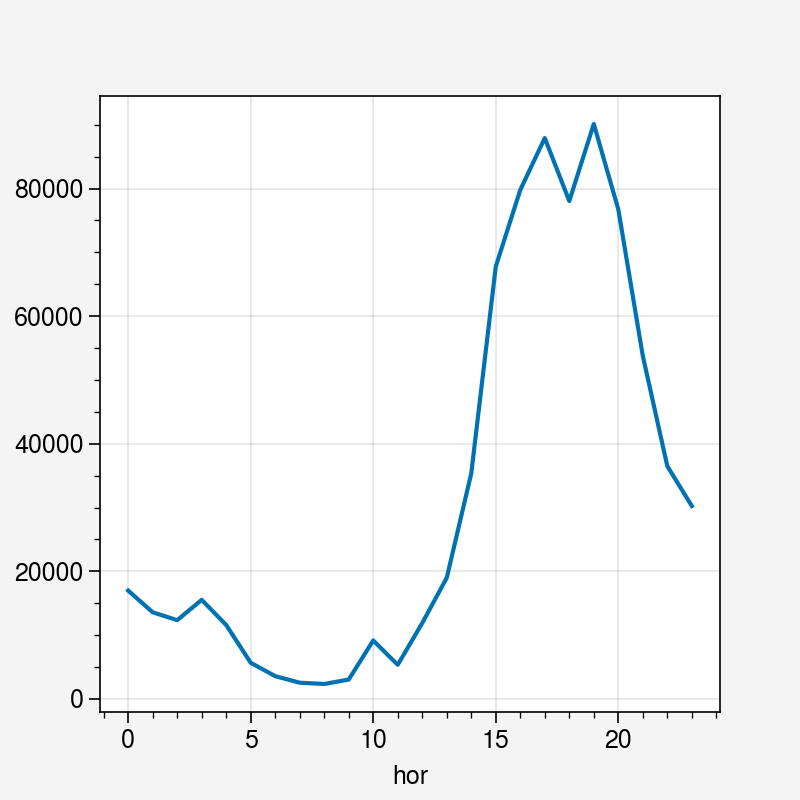

In [84]:
df_ic.groupby('hor').count()['ano'].plot()

Agrupando os dados do relâmpagos intra-nuvem por hora para a coluna do ano e atribuindo o valor para variável **ic_horario**

In [85]:
ic_horario = df_ic.groupby('hor').count()['ano']
ic_horario

,ano
hor,
0,16984
1,13580
2,12348
3,15531
4,11587
5,5669
6,3572
7,2543
8,2341


Extraindo os valores dos índices e valores da quantidade de relâmpagos intra-nuvem por hora. Os valores dos índices (0, 1, 2, 3, ... 23 horas) é  atribuído para a variável **x** e os valores para a variável **y_ic**

In [86]:
# valores do eixo "X"
x = ic_horario.index
x

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int64', name='hor')

In [87]:
# valores do eixo "Y"
y_ic = ic_horario.values
y_ic

array([16984, 13580, 12348, 15531, 11587,  5669,  3572,  2543,  2341,
        3037,  9162,  5351, 11895, 18990, 35357, 67761, 79791, 87910,
       78046, 90117, 76735, 53764, 36492, 30239])

Plotando a figura para os relâmpagos intra-nuvem **(IC**)

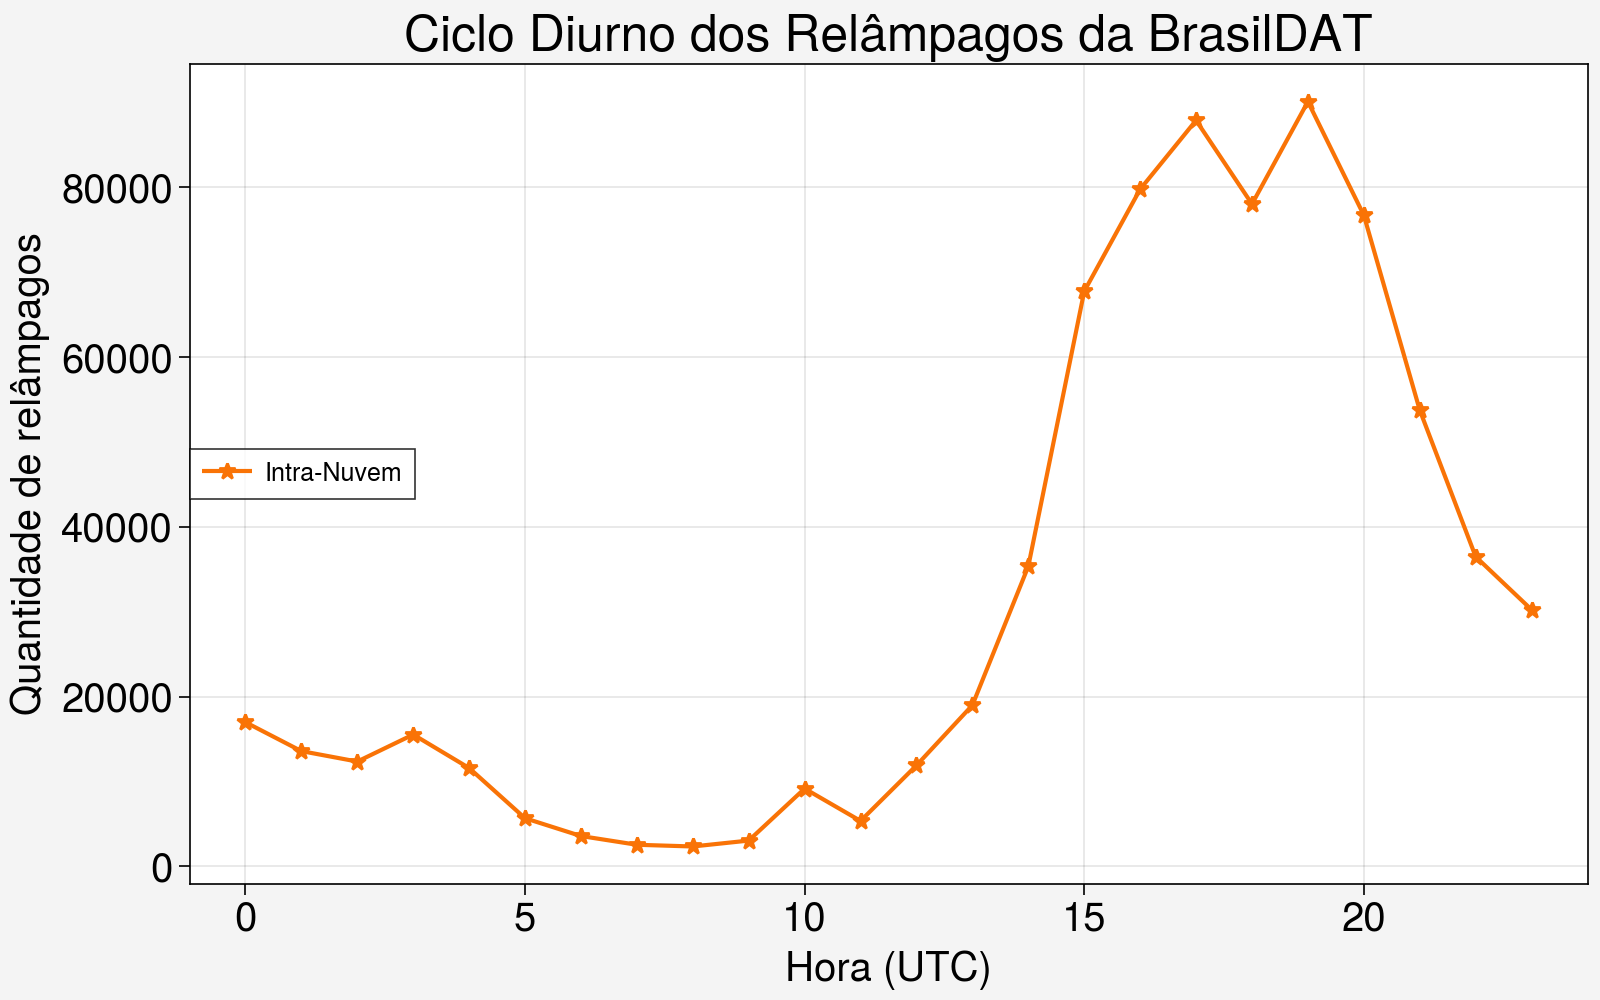

In [88]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(x, y_ic, color='orange', marker='*', label='Intra-Nuvem')

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)',
          ylabel='Quantidade de relâmpagos',
          title='Ciclo Diurno dos Relâmpagos da BrasilDAT',
          xtickminor=False,
          ytickminor=False,
          small='20px', large='25px',
          xlim=(-1, 24))

# adiciona a legenda
ax.legend()

# salva figura
fig.save(f'{dir}/output/Fig_1_diurno_ic.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

Agrupando os dados dos relâmpagos nuvem-solo negativo e positivo

In [89]:
cgneg_horario = df_cgneg.groupby('hor').count()['ano']
cgpos_horario = df_cgpos.groupby('hor').count()['ano']

In [90]:
y_cgneg = cgneg_horario.values
y_cgneg

array([ 6765,  4994,  3927,  5094,  4804,  4152,  3167,  2631,  2154,
        2387,  2595,  1545,  1468,  2329,  5727, 13096, 16553, 20454,
       21098, 21996, 20088, 16171, 11590, 10790])

In [91]:
y_cgpos = cgpos_horario.values
y_cgpos

array([1046,  703,  832,  841,  809, 1049,  670,  282,  383,  331,  238,
        174,  205,  355,  587,  944, 1178, 1728, 2048, 1698, 2338, 2429,
        925, 1245])

Plotando a figura para os relâmpagos intra-nuvem, nuvem-solo negativo e positivo

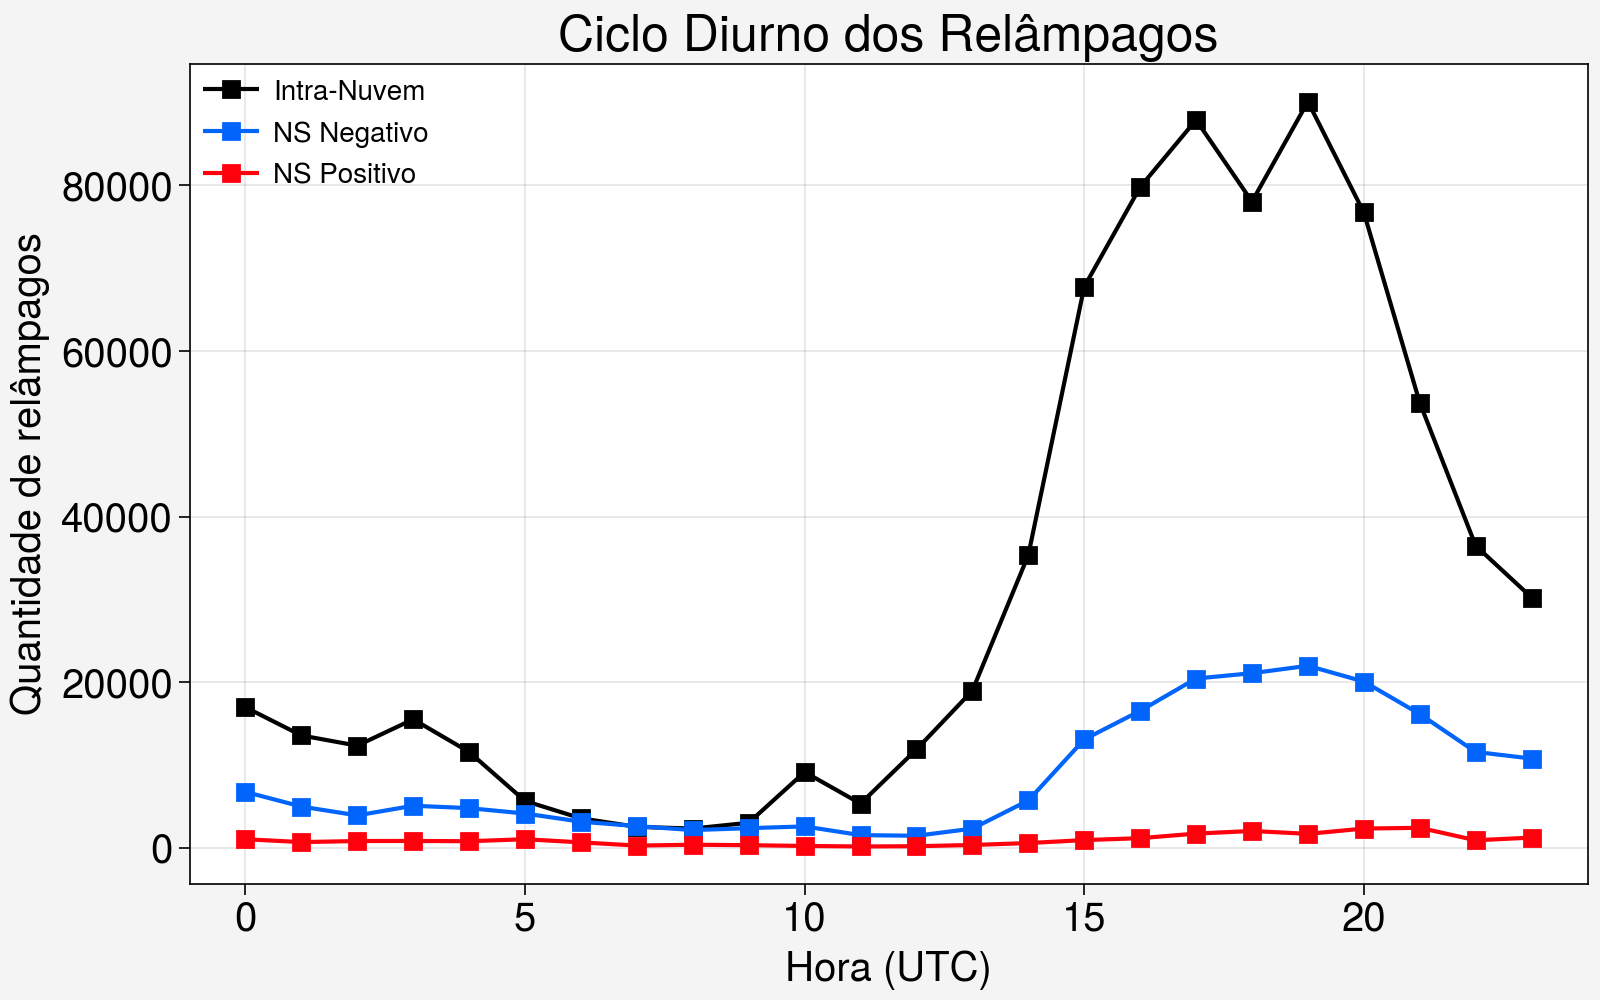

In [92]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(x, y_ic, color='black', marker='s', label='Intra-Nuvem')
ax.plot(x, y_cgneg, color='bright blue', marker='s', label='NS Negativo')
ax.plot(x, y_cgpos, color='bright red', marker='s', label='NS Positivo')

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)', ylabel='Quantidade de relâmpagos',
          title='Ciclo Diurno dos Relâmpagos',
          xtickminor=False, ytickminor=False,
          small='20px', large='25px',
          xlim=(-1, 24))

# adiciona a legenda
ax.legend(frameon=False, ncols=1, loc='ul', prop={'size': 10})

# salva figura
fig.save(f'{dir}/output/Fig_2_diurno_todostipos.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

##**Pico de corrente por hora:**

Visualizando a variável dos relâmpagos negativos (**df_cgneg**)

In [93]:
df_cgneg

,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(kA)
0,CG,2020,1,1,23,59.0,59.0,-20.8520,-52.4757,-33.443
3,CG,2020,1,1,23,59.0,59.0,-20.0165,-43.6981,-4.643
11,CG,2020,1,1,23,59.0,58.0,-20.1681,-43.4872,-5.741
13,CG,2020,1,1,23,59.0,57.0,-19.9145,-43.9371,-6.126
17,CG,2020,1,1,23,59.0,57.0,-30.1202,-69.0784,-4.900
...,...,...,...,...,...,...,...,...,...,...
1003621,CG,2020,1,1,0,0.0,5.0,-6.9903,-37.9176,-15.500
1003622,CG,2020,1,1,0,0.0,5.0,-10.8139,-75.7802,-12.294
1003623,CG,2020,1,1,0,0.0,5.0,-10.8016,-75.8007,-7.286
1003625,CG,2020,1,1,0,0.0,5.0,8.0551,-75.1079,-17.128


Agrupando a variável e visualizando na tela  

In [94]:
df_cgneg.groupby('hor')['pc(kA)'].mean()

,pc(kA)
hor,
0,-25.724685
1,-25.161219
2,-26.632484
3,-25.903846
4,-23.401232
5,-23.465673
6,-28.393338
7,-33.490640
8,-29.785414


Agrupando as variáveis para o pico de corrente dos relâmpagos negativos (**pccgneg_horario**) e positivos (**pccgpos_horario**)

In [95]:
# Agrupando
pccgneg_horario = df_cgneg.groupby('hor')['pc(kA)'].mean()
pccgpos_horario = df_cgpos.groupby('hor')['pc(kA)'].mean()

In [96]:
# extraindo os valores dos relâmpagos CG negativos
y_pccgneg = abs(pccgneg_horario.values)
y_pccgneg

array([25.72468485, 25.16121906, 26.63248383, 25.9038457 , 23.40123168,
       23.46567269, 28.39333849, 33.49064044, 29.78541411, 35.27247256,
       42.09651561, 29.74741424, 26.83475204, 22.70100172, 15.43866527,
       14.59279925, 15.32801649, 16.35082336, 17.87719732, 17.99853978,
       18.52464576, 19.34888448, 23.78519594, 22.05321807])

In [97]:
# extraindo os valores dos relâmpagos CG positivos
y_pccgpos = pccgpos_horario.values
y_pccgpos

array([40.83923423, 44.26418492, 49.17632933, 41.99253151, 37.02157108,
       37.23031649, 37.66443284, 38.3937305 , 43.9045953 , 42.59648036,
       35.4280084 , 42.10013218, 45.82521951, 42.42323662, 39.45921976,
       38.53617903, 37.00962479, 36.12133044, 36.81594092, 36.56155418,
       37.64422498, 37.65814368, 36.22809514, 36.85126747])

Plotando a figura para os relâmpagos intra-nuvem, nuvem-solo negativo e positivo

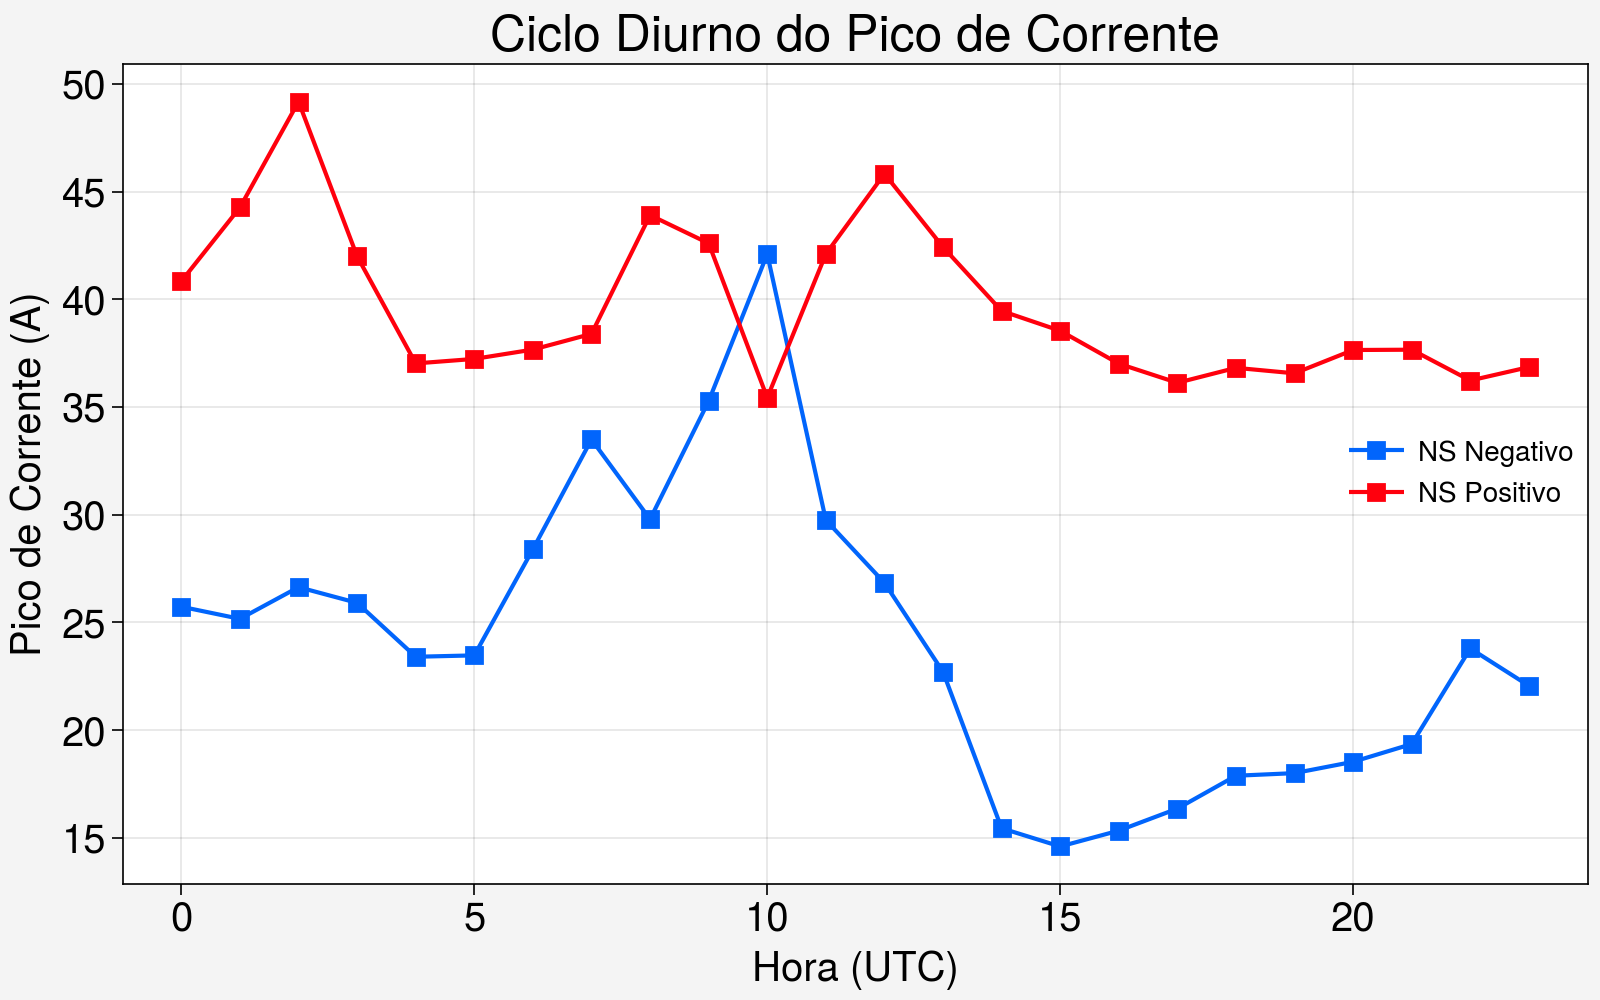

In [98]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(x, y_pccgneg, color='bright blue', marker='s', label='NS Negativo')
ax.plot(x, y_pccgpos, color='bright red', marker='s', label='NS Positivo')

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)', ylabel='Pico de Corrente (A)', title='Ciclo Diurno do Pico de Corrente',
          xtickminor=False, ytickminor=False, small='20px', large='25px', xlim=(-1, 24))

# adiciona a legenda
ax.legend(frameon=False, ncols=1,  prop={'size': 10})

# salva figura
fig.save(f'{dir}/output/Fig_3_diurno_pc.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

### **E por hoje é só pessoal. Até a próxima!**

# **PERGUNTAS:**

1) Através da análise de dados que você realizou na Parte 1 a 3, qual o tipo de relâmpago ($\underline{intra-nuvem}$ ou $\underline{nuvem-solo}$) que ocorre em maior quantidade?

---

2) Baseado na figura sobre a $\underline{quantidade}$ de relâmpago por hora produzida, indique e explique em qual horário do dia ocorre a maior quantidade de relâmpagos.

---

3) Baseado na figura sobre a média do $\underline{pico\ de\ corrente}$ de relâmpagos por hora produzida, indique e explique em qual horário do dia ocorre os relâmpagos mais intensos.
